In [1]:
# Basic Libraries
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt # we only need pyplot
sb.set() # set the default Seaborn style for graphics

# Importing the Dataset

In [2]:
insurance_data = pd.read_csv("train.csv")
insurance_data.head()

,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
0,1,Male,44,1,28.0,0,> 2 Years,Yes,40454.0,26.0,217,1
1,2,Male,76,1,3.0,0,1-2 Year,No,33536.0,26.0,183,0
2,3,Male,47,1,28.0,0,> 2 Years,Yes,38294.0,26.0,27,1
3,4,Male,21,1,11.0,1,< 1 Year,No,28619.0,152.0,203,0
4,5,Female,29,1,41.0,1,< 1 Year,No,27496.0,152.0,39,0


# Firstly, let's use a decision tree classifier to predict response

In [3]:
# y is the response, x are the variables

y = pd.DataFrame(insurance_data["Response"])
X = pd.DataFrame(insurance_data[["Age"]])

# We use one hot encoding to treat categorical variables
one_hot_data = pd.get_dummies(insurance_data[['Previously_Insured','Vehicle_Age', 'Vehicle_Damage', "Policy_Sales_Channel"]],drop_first=True)
X = pd.concat([X, one_hot_data.set_index(X.index)], axis=1)
total_df = pd.concat([y, X.set_index(X.index)], axis=1)
print(X)

        Age  Previously_Insured  Policy_Sales_Channel  Vehicle_Age_< 1 Year  \
0        44                   0                  26.0                     0   
1        76                   0                  26.0                     0   
2        47                   0                  26.0                     0   
3        21                   1                 152.0                     1   
4        29                   1                 152.0                     1   
...     ...                 ...                   ...                   ...   
381104   74                   1                  26.0                     0   
381105   30                   1                 152.0                     1   
381106   21                   1                 160.0                     1   
381107   68                   0                 124.0                     0   
381108   46                   0                  26.0                     0   

        Vehicle_Age_> 2 Years  Vehicle_Damage_Yes  

In [4]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25)

print("Train Set :", y_train.shape, X_train.shape)
print("Test Set  :", y_test.shape, X_test.shape)

Train Set : (285831, 1) (285831, 6)
Test Set  : (95278, 1) (95278, 6)


In [7]:
from sklearn.tree import DecisionTreeClassifier

dectree = DecisionTreeClassifier(max_depth=20)
dectree.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=20)

Goodness of Fit of Model 	Train Dataset
Classification Accuracy 	: 0.8799675332626622

Goodness of Fit of Model 	Test Dataset
Classification Accuracy 	: 0.8748294464619325



<AxesSubplot:>

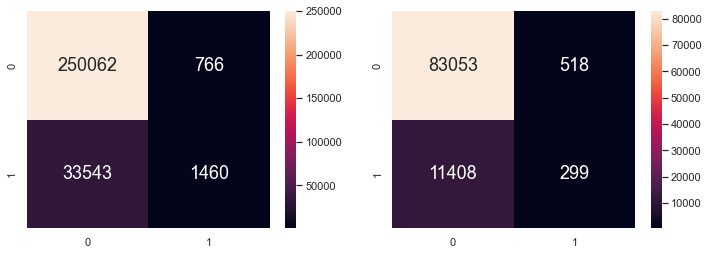

In [8]:
from sklearn.metrics import confusion_matrix
# Predict 'will buy'
y_train_pred = dectree.predict(X_train)
y_test_pred = dectree.predict(X_test)

# Check the Goodness of Fit (on Train Data)
print("Goodness of Fit of Model \tTrain Dataset")
print("Classification Accuracy \t:", dectree.score(X_train, y_train))
print()

# Check the Goodness of Fit (on Test Data)
print("Goodness of Fit of Model \tTest Dataset")
print("Classification Accuracy \t:", dectree.score(X_test, y_test))
print()

# Plot the Confusion Matrix for Train and Test
f, axes = plt.subplots(1, 2, figsize=(12, 4))
sb.heatmap(confusion_matrix(y_train, y_train_pred),
           annot = True, fmt=".0f", annot_kws={"size": 18}, ax = axes[0])
sb.heatmap(confusion_matrix(y_test, y_test_pred), 
           annot = True, fmt=".0f", annot_kws={"size": 18}, ax = axes[1])

# Our current model seems to be conservative towards 'not interested'. Let's try using random forest  classification instead

In [10]:
from sklearn.ensemble import RandomForestClassifier

randomforest = RandomForestClassifier(max_depth=20)
randomforest.fit(X_train, y_train.values.ravel())

RandomForestClassifier(max_depth=20)

Goodness of Fit of Model 	Train Dataset
Classification Accuracy 	: 0.880198438937694

Goodness of Fit of Model 	Test Dataset
Classification Accuracy 	: 0.8747979596549046



<AxesSubplot:>

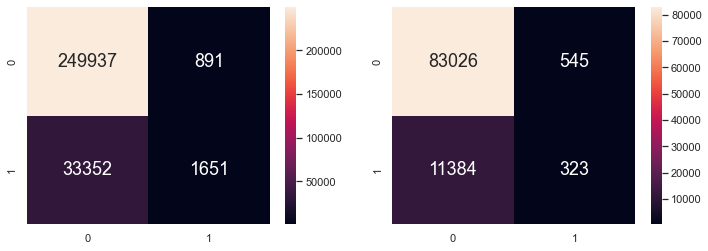

In [11]:
# Predict 'will buy'
y_train_pred = randomforest.predict(X_train)
y_test_pred = randomforest.predict(X_test)

# Check the Goodness of Fit (on Train Data)
print("Goodness of Fit of Model \tTrain Dataset")
print("Classification Accuracy \t:", randomforest.score(X_train, y_train))
print()

# Check the Goodness of Fit (on Test Data)
print("Goodness of Fit of Model \tTest Dataset")
print("Classification Accuracy \t:", randomforest.score(X_test, y_test))
print()

# Plot the Confusion Matrix for Train and Test
f, axes = plt.subplots(1, 2, figsize=(12, 4))
sb.heatmap(confusion_matrix(y_train, y_train_pred),
           annot = True, fmt=".0f", annot_kws={"size": 18}, ax = axes[0])
sb.heatmap(confusion_matrix(y_test, y_test_pred), 
           annot = True, fmt=".0f", annot_kws={"size": 18}, ax = axes[1])

# Our new model has improved slightly. However, it's still not satisfactory. Perhaps using neural networks will be better

In [12]:
from sklearn import preprocessing

# We will be using label encoding to handle categorical variables

le = preprocessing.LabelEncoder()

y = pd.DataFrame(insurance_data["Response"])
X = pd.DataFrame(insurance_data[["Age"]])
encoded_data = pd.DataFrame(insurance_data[['Previously_Insured','Vehicle_Age', 'Vehicle_Damage', 'Policy_Sales_Channel']])
encoded_data = encoded_data.apply(le.fit_transform)
X = pd.concat([X, encoded_data.set_index(X.index)], axis=1)

In [13]:
from sklearn.preprocessing import StandardScaler

# We scale the numerical data to increase the speed of training

scaler = StandardScaler()

X[["Age"]] = scaler.fit_transform(X[["Age"]])
print(X)

             Age  Previously_Insured  Vehicle_Age  Vehicle_Damage  \
0       0.333777                   0            2               1   
1       2.396751                   0            0               0   
2       0.527181                   0            2               1   
3      -1.148985                   1            1               0   
4      -0.633242                   1            1               0   
...          ...                 ...          ...             ...   
381104  2.267815                   1            0               0   
381105 -0.568774                   1            1               0   
381106 -1.148985                   1            1               0   
381107  1.881007                   0            2               1   
381108  0.462713                   0            0               0   

        Policy_Sales_Channel  
0                         24  
1                         24  
2                         24  
3                        145  
4               

In [14]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25)

print("Train Set :", y_train.shape, X_train.shape)
print("Test Set  :", y_test.shape, X_test.shape)

Train Set : (285831, 1) (285831, 5)
Test Set  : (95278, 1) (95278, 5)


In [15]:
from sklearn.neural_network import MLPClassifier
mlp = MLPClassifier(hidden_layer_sizes=(100, 100, 100))
mlp.fit(X_train, y_train.values.ravel())

MLPClassifier(hidden_layer_sizes=(100, 100, 100))

Goodness of Fit of Model 	Train Dataset
Classification Accuracy 	: 0.8774135765539777

Goodness of Fit of Model 	Test Dataset
Classification Accuracy 	: 0.8775478074686707



<AxesSubplot:>

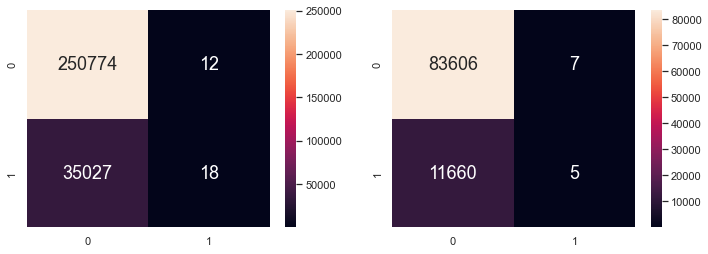

In [16]:
# Predict 'will buy'
y_train_pred = mlp.predict(X_train)
y_test_pred = mlp.predict(X_test)

# Check the Goodness of Fit (on Train Data)
print("Goodness of Fit of Model \tTrain Dataset")
print("Classification Accuracy \t:", mlp.score(X_train, y_train))
print()

# Check the Goodness of Fit (on Test Data)
print("Goodness of Fit of Model \tTest Dataset")
print("Classification Accuracy \t:", mlp.score(X_test, y_test))
print()

# Plot the Confusion Matrix for Train and Test
f, axes = plt.subplots(1, 2, figsize=(12, 4))
sb.heatmap(confusion_matrix(y_train, y_train_pred),
           annot = True, fmt=".0f", annot_kws={"size": 18}, ax = axes[0])
sb.heatmap(confusion_matrix(y_test, y_test_pred), 
           annot = True, fmt=".0f", annot_kws={"size": 18}, ax = axes[1])

# Unfortunately, the model using neural networks is even worse.

# Finally, let's try XGBoost and see if that is any better

In [17]:
from sklearn import preprocessing

# We will be using label encoding to handle categorical variables
le = preprocessing.LabelEncoder()

y = pd.DataFrame(insurance_data["Response"])
X = pd.DataFrame(insurance_data[["Age"]])
encoded_data = pd.DataFrame(insurance_data[['Previously_Insured','Vehicle_Age', 'Vehicle_Damage', 'Policy_Sales_Channel']])
encoded_data = encoded_data.apply(le.fit_transform)
X = pd.concat([X, encoded_data.set_index(X.index)], axis=1)

In [18]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25)

print("Train Set :", y_train.shape, X_train.shape)
print("Test Set  :", y_test.shape, X_test.shape)

Train Set : (285831, 1) (285831, 5)
Test Set  : (95278, 1) (95278, 5)


In [19]:
from xgboost import XGBClassifier
from sklearn.model_selection import GridSearchCV

"""Using knowledge we know from previous models, we know that there
is a case of high class imbalance (not interested). We need to tune
the parameters so that our model gives more positives. We need to
modify gamma and scale_pos_weight. We fix scale_pos_weight to be
higher than 0. While using GridSearchCV for hyper-parameter
optimisation
"""
# We modify gamma
parameter_space = {
    'gamma' : [0.2, 0.3, 0.4],
}

xgb = XGBClassifier(n_estimators=350, learning_rate=0.05, scale_pos_weight=2, verbosity=0, use_label_encoder=False)
clf = GridSearchCV(xgb, parameter_space)

clf.fit(X_train, y_train.values.ravel())

GridSearchCV(estimator=XGBClassifier(base_score=None, booster=None,
                                     colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None,
                                     enable_categorical=False, gamma=None,
                                     gpu_id=None, importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=0.05, max_delta_step=None,
                                     max_depth=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     n_estimators=350, n_jobs=None,
                                     num_parallel_tree=None, predictor=None,
                                     random_state=None, reg_alpha=None,
                                     reg_lambda=None, scale_pos_weight=2,
               

Goodness of Fit of Model 	Train Dataset
Classification Accuracy 	: 0.8481270401041174

Goodness of Fit of Model 	Test Dataset
Classification Accuracy 	: 0.8494090975881106



<AxesSubplot:>

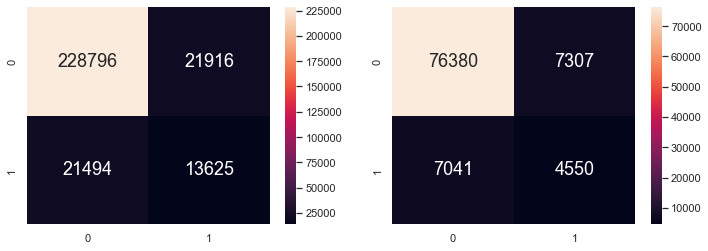

In [20]:
# Predict 'will buy'
y_train_pred = clf.predict(X_train)
y_test_pred = clf.predict(X_test)

# Check the Goodness of Fit (on Train Data)
print("Goodness of Fit of Model \tTrain Dataset")
print("Classification Accuracy \t:", clf.score(X_train, y_train))
print()

# Check the Goodness of Fit (on Test Data)
print("Goodness of Fit of Model \tTest Dataset")
print("Classification Accuracy \t:", clf.score(X_test, y_test))
print()

# Plot the Confusion Matrix for Train and Test
f, axes = plt.subplots(1, 2, figsize=(12, 4))
sb.heatmap(confusion_matrix(y_train, y_train_pred),
           annot = True, fmt=".0f", annot_kws={"size": 18}, ax = axes[0])
sb.heatmap(confusion_matrix(y_test, y_test_pred), 
           annot = True, fmt=".0f", annot_kws={"size": 18}, ax = axes[1])

# Our XGBoost model is now predicting more positives, though at the cost of accuracy

# Putting everything together
## Let's use an accurate, conservative model (random forest) as well as a less accurate, optimistic model (XGBoost) to predict the number of customers that are willing to buy vehicle insurance

In [21]:
insurance_actual = pd.read_csv("test.csv")
insurance_actual.head()

,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage
0,381110,Male,25,1,11.0,1,< 1 Year,No,35786.0,152.0,53
1,381111,Male,40,1,28.0,0,1-2 Year,Yes,33762.0,7.0,111
2,381112,Male,47,1,28.0,0,1-2 Year,Yes,40050.0,124.0,199
3,381113,Male,24,1,27.0,1,< 1 Year,Yes,37356.0,152.0,187
4,381114,Male,27,1,28.0,1,< 1 Year,No,59097.0,152.0,297


# Using random forest classifier

In [37]:
# y is the response, x are the variables

X = pd.DataFrame(insurance_actual[["Age"]])

# We use one hot encoding to treat categorical variables
one_hot_data = pd.get_dummies(insurance_actual[['Previously_Insured','Vehicle_Age', 'Vehicle_Damage', "Policy_Sales_Channel"]],drop_first=True)
X = pd.concat([X, one_hot_data.set_index(X.index)], axis=1)
total_df = pd.concat([y, X.set_index(X.index)], axis=1)

y_pred = randomforest.predict(X)

C:\Users\shiho\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


[Text(0.5, 0, 'Interested in vehicle insurance')]

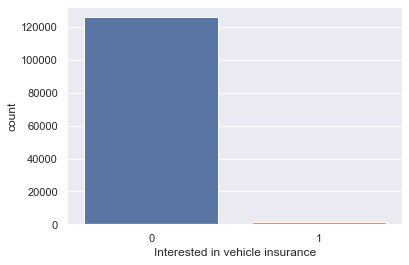

In [38]:
ax = sb.countplot(y_pred) 
ax.set(xlabel="Interested in vehicle insurance")

# Using XGBoost

In [39]:
# We will be using label encoding to handle categorical variables
le = preprocessing.LabelEncoder()

X = pd.DataFrame(insurance_actual[["Age"]])
encoded_data = pd.DataFrame(insurance_actual[['Previously_Insured','Vehicle_Age', 'Vehicle_Damage', 'Policy_Sales_Channel']])
encoded_data = encoded_data.apply(le.fit_transform)
X = pd.concat([X, encoded_data.set_index(X.index)], axis=1)

y_pred = clf.predict(X)

C:\Users\shiho\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


[Text(0.5, 0, 'Interested in vehicle insurance')]

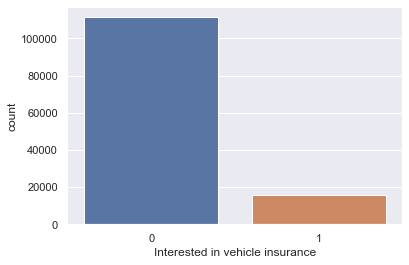

In [40]:
ax = sb.countplot(y_pred) 
ax.set(xlabel="Interested in vehicle insurance")